In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlscorecheck.auc import integrate_roc_curve, auc_min, auc_max, roc_min, roc_max, auc_rmin, auc_maxa, roc_maxa, roc_rmin, auc_estimator, p_norm_fit, p_norm_fit_best, integrate_roc_curves, sample1, simplify_roc

from sklearn.metrics import r2_score as r2_score_orig
from sklearn.metrics import mean_absolute_percentage_error as mean_absolute_percentage_error_orig

from scipy.stats import beta, binom

from scipy.stats import skew, skewtest

from scipy.spatial import ConvexHull

import sympy as sp
import numba as nb

In [987]:
n_samples = 500
n_nodes = 100

fprs = np.sort(np.random.random_sample((n_samples, n_nodes)), axis=1)
tprs = np.sort(np.random.random_sample((n_samples, n_nodes)), axis=1)
tprs = np.flip(tprs, axis=1)

fprs = np.vstack([np.repeat(0.0, n_samples), fprs.T, np.repeat(1.0, n_samples)]).T
tprs = np.vstack([np.repeat(1.0, n_samples), tprs.T, np.repeat(0.0, n_samples)]).T

#fprs = np.cumsum(fprs, axis=1)
#tprs = np.cumsum(tprs, axis=1)

#fprs = (fprs.T / fprs[:, -1]).T
#tprs = (tprs.T / tprs[:, -1]).T
#fprs = (fprs.T / np.sum(fprs, axis=1)).T
#tprs = (tprs.T / np.sum(tprs, axis=1)).T

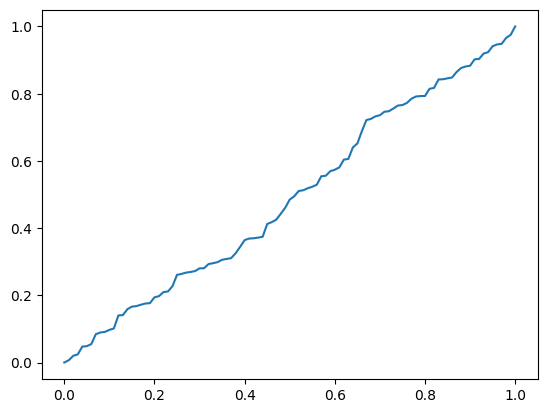

In [998]:
plt.plot(np.linspace(0, 1, fprs.shape[1]-1), np.cumsum(np.diff(fprs[2])))

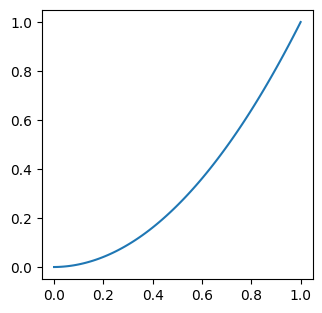

In [960]:
plt.figure(figsize=(3.5, 3.5))
plt.plot(np.linspace(0, 1, fprs.shape[1]), np.mean(fprs, axis=0))

In [961]:
from numpy.random import dirichlet

In [990]:
tmp0 = dirichlet(np.repeat(1.0, 100), 100)
tmp = np.cumsum(tmp0, axis=1)
tmp = (tmp.T / tmp[:,-1]).T

In [991]:
tmp0[0]

array([7.18048958e-03, 1.30936920e-03, 2.73268357e-03, 7.05177303e-03,
       1.49300295e-05, 2.75128130e-03, 4.34567734e-03, 9.18578111e-03,
       1.34235668e-02, 1.57887571e-02, 1.75866343e-02, 9.39583891e-03,
       1.14177160e-02, 2.79743366e-02, 3.94324168e-03, 1.29028620e-03,
       5.18760000e-03, 7.46016795e-03, 1.02968984e-03, 7.19550848e-03,
       8.72463941e-03, 6.47696954e-03, 1.72070652e-02, 2.77828084e-03,
       6.65531351e-04, 1.63597622e-03, 1.28279468e-02, 4.89150483e-03,
       4.66834452e-04, 1.82724717e-03, 1.23823764e-02, 2.38574399e-02,
       2.38984779e-02, 2.87528815e-02, 1.22393750e-03, 2.90794561e-03,
       2.04744788e-02, 5.07624576e-03, 1.36326492e-02, 3.66316595e-02,
       2.51320489e-03, 2.23191734e-03, 8.14363051e-03, 2.22894055e-03,
       7.43090783e-03, 2.96579208e-03, 4.15487424e-03, 2.15453283e-03,
       2.58439020e-03, 1.60936683e-02, 3.09472777e-03, 5.78592199e-03,
       3.29989191e-03, 1.23182242e-03, 3.20153611e-03, 5.84998243e-04,
      

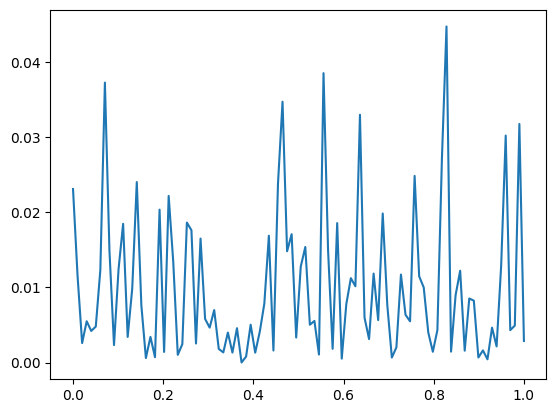

In [996]:
plt.plot(np.linspace(0, 1, 100), tmp0[2])

In [377]:
fpr0 = 0.024
tpr0 = 0.776
p = 30_000
n = 300_000

In [379]:
n_nodes = 100

In [542]:
fprs_all = []
tprs_all = []

for _ in range(100):
    fprs = np.sort(np.random.random_sample(n_nodes))
    tprs = np.sort(np.random.random_sample(n_nodes))[::-1]

    fprs = np.cumsum(fprs/np.sum(fprs))
    tprs = np.cumsum(tprs/np.sum(tprs))
    fprs_all.append(fprs)
    tprs_all.append(tprs)

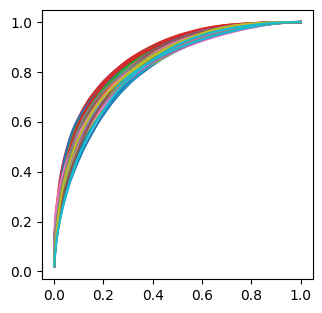

In [544]:
plt.figure(figsize=(3.5, 3.5))
for fprs1, tprs1 in zip(fprs_all, tprs_all):
    plt.plot(fprs1, tprs1)

In [521]:
fpr0 = 0.024
tpr0 = 0.776

In [ ]:
def convex_hull_(fprs, tprs):
    hull = ConvexHull(np.vstack([np.hstack([fprs, [1.0]]), np.hstack([tprs, 0.0])]).T)
    vertices = hull.vertices[hull.vertices < len(fprs)]
    sorting = np.argsort(vertices)
    fprs_ch = fprs[vertices[sorting]]
    tprs_ch = tprs[vertices[sorting]]
    return fprs_ch, tprs_ch

def sample_latest(fpr0, tpr0, p, n, n_nodes=200, n_samples=10):
    n_nodes = min(min(p, n) * 2 + 2, 200)

    fpr0 = max(min(1.0 - 1/n, fpr0), 1/n)
    tpr0 = max(min(1.0 - 1/p, tpr0), 1/p)

    fpr1 = 1.0 - tpr0
    tpr1 = 1.0 - fpr0

    if fpr1 < fpr0:
        fpr0, tpr0, fpr1, tpr1 = fpr1, tpr1, fpr0, tpr0

    #fprs = np.sort(np.random.dirichlet(np.repeat(1.0, n_nodes), (n_samples)), axis=1)
    #tprs = np.sort(np.random.dirichlet(np.repeat(1.0, n_nodes), (n_samples)), axis=1)

    fprs = np.sort(np.random.random_sample((n_samples, n_nodes)), axis=1)
    tprs = np.sort(np.random.random_sample((n_samples, n_nodes)), axis=1)

    #fprs = np.tile(np.repeat(1/n_nodes, n_nodes), (n_samples, 1))
    #tprs = np.tile(np.repeat(1/n_nodes, n_nodes), (n_samples, 1))

    tprs = np.flip(tprs, axis=1)

    #fprs = np.vstack([np.repeat(0.0, n_samples), fprs.T, np.repeat(1.0, n_samples)]).T
    #tprs = np.vstack([np.repeat(1.0, n_samples), tprs.T, np.repeat(0.0, n_samples)]).T

    fprs = np.cumsum(fprs, axis=1)
    tprs = np.cumsum(tprs, axis=1)

    fprs = (fprs.T / fprs[:, -1]).T
    tprs = (tprs.T / tprs[:, -1]).T

    fprs = np.vstack([np.repeat(0.0, n_samples), fprs.T]).T
    tprs = np.vstack([tprs.T, np.repeat(0.0, n_samples)]).T

    #fprs = np.round(fprs * n) / n
    #tprs = np.round(tprs * p) / p

    fpr0_idx = np.argmin(np.abs(fprs - fpr0), axis=1)
    tpr0_idx = np.argmin(np.abs(tprs - tpr0), axis=1)
    fpr1_idx = np.argmin(np.abs(fprs - fpr1), axis=1)
    tpr1_idx = np.argmin(np.abs(tprs - tpr1), axis=1)

    #print(tprs)
    #print(fpr0_idx, tpr0_idx, fpr1_idx, tpr1_idx)
    #print(fprs[0], tprs[0])

    n_nodes_out = min(min(p, n) * 2 + 2, 200)
    """
    nodes = np.hstack([[0], np.sort(np.random.random_sample(n_nodes-1)), [1]])
    nodes = nodes.cumsum()
    nodes = nodes / nodes[-1]
    nodes = 
    """
    n_nodes_out = int(n_nodes_out / 3)

    r = np.sort(np.random.random_sample((n_samples, n_nodes_out)), axis=1).T
    #r = np.linspace(0, 1, 20)
    #r = np.tile(r, (n_samples, 1)).T
    fpr_samp0 = np.floor(r * fpr0_idx).astype(int).T

    r = np.sort(np.random.random_sample((n_samples, n_nodes_out)), axis=1).T
    tpr_samp0 = np.floor(r * tpr0_idx).astype(int).T

    r = np.sort(np.random.random_sample((n_samples, n_nodes_out)), axis=1).T
    fpr_samp1 = (np.floor(r * (fpr1_idx - fpr0_idx)).astype(int) + fpr0_idx).T

    r = np.sort(np.random.random_sample((n_samples, n_nodes_out)), axis=1).T
    tpr_samp1 = (np.floor(r * (tpr1_idx - tpr0_idx)).astype(int) + tpr0_idx).T

    r = np.sort(np.random.random_sample((n_samples, n_nodes_out)), axis=1).T
    fpr_samp2 = (np.floor(r * (n_nodes - fpr1_idx)).astype(int) + fpr1_idx).T

    r = np.sort(np.random.random_sample((n_samples, n_nodes_out)), axis=1).T
    tpr_samp2 = (np.floor(r * (n_nodes - tpr1_idx)).astype(int) + tpr1_idx).T

    fpr_samp0 = fprs[np.arange(n_samples)[:, None], fpr_samp0]
    tpr_samp0 = tprs[np.arange(n_samples)[:, None], tpr_samp0]
    fpr_samp1 = fprs[np.arange(n_samples)[:, None], fpr_samp1]
    tpr_samp1 = tprs[np.arange(n_samples)[:, None], tpr_samp1]
    fpr_samp2 = fprs[np.arange(n_samples)[:, None], fpr_samp2]
    tpr_samp2 = tprs[np.arange(n_samples)[:, None], tpr_samp2]

    fprs = np.hstack([fpr_samp0, fpr_samp1, fpr_samp2])
    tprs = np.hstack([tpr_samp0, tpr_samp1, tpr_samp2])

    fprs = np.vstack([np.repeat(0.0, n_samples), fprs.T, np.repeat(1.0, n_samples)]).T
    tprs = np.vstack([np.repeat(0.0, n_samples), tprs.T, np.repeat(1.0, n_samples)]).T

    fprs = np.round(fprs * n) / n
    tprs = np.round(tprs * p) / p

    return fprs, tprs

def sample_latest2(fpr0, tpr0, p, n, n_nodes=200, n_samples=10):
    fprs = np.sort(np.random.random_sample((n_samples, n_nodes)), axis=1)
    tprs = np.sort(np.random.random_sample((n_samples, n_nodes)), axis=1)
    tprs = np.flip(tprs, axis=1)

    fprs = np.round(fprs * n) / n
    tprs = np.round(tprs * p) / p

    fprs = np.vstack([np.repeat(0.0, n_samples), fprs.T, np.repeat(1.0, n_samples)]).T
    tprs = np.vstack([np.repeat(1.0, n_samples), tprs.T, np.repeat(0.0, n_samples)]).T

    fprs = np.cumsum(fprs, axis=1)
    tprs = np.cumsum(tprs, axis=1)

    fprs = (fprs.T / fprs[:, -1]).T
    tprs = (tprs.T / tprs[:, -1]).T

    fpr0_idx = np.argmin(np.abs(fprs - fpr0), axis=1)
    tpr0_idx = np.argmin(np.abs(tprs - tpr0), axis=1)

    #print(fpr0_idx[0], tpr0_idx[0])

    n_nodes_out = min(p, n) * 2 + 2
    n_nodes_out = int(n_nodes_out / 3)

    r = np.sort(np.random.random_sample((n_samples, n_nodes_out)), axis=1).T
    #r = np.linspace(0, 1, 20)
    #r = np.tile(r, (n_samples, 1)).T
    fpr_samp0 = np.floor(r * fpr0_idx).astype(int).T

    r = np.sort(np.random.random_sample((n_samples, n_nodes_out)), axis=1).T
    tpr_samp0 = np.floor(r * tpr0_idx).astype(int).T

    r = np.sort(np.random.random_sample((n_samples, n_nodes_out)), axis=1).T
    fpr_samp2 = (np.floor(r * (n_nodes - fpr0_idx)).astype(int) + fpr0_idx).T

    r = np.sort(np.random.random_sample((n_samples, n_nodes_out)), axis=1).T
    tpr_samp2 = (np.floor(r * (n_nodes - tpr0_idx)).astype(int) + tpr0_idx).T

    fpr_samp0 = fprs[np.arange(n_samples)[:, None], fpr_samp0]
    tpr_samp0 = tprs[np.arange(n_samples)[:, None], tpr_samp0]
    fpr_samp2 = fprs[np.arange(n_samples)[:, None], fpr_samp2]
    tpr_samp2 = tprs[np.arange(n_samples)[:, None], tpr_samp2]

    fprs = np.hstack([fpr_samp0, fpr_samp2])
    tprs = np.hstack([tpr_samp0, tpr_samp2])

    fprs = np.vstack([np.repeat(0.0, n_samples), fprs.T, np.repeat(1.0, n_samples)]).T
    tprs = np.vstack([np.repeat(0.0, n_samples), tprs.T, np.repeat(1.0, n_samples)]).T

    return fprs, tprs

def auc_latest(fpr0, tpr0, p, n, n_nodes=200, n_samples=10):
    fprs, tprs = sample_latest(fpr0, tpr0, p, n, n_nodes, n_samples)
    fprs = np.round(fprs*n)/n
    tprs = np.round(tprs*p)/p
    #aucs = [integrate_roc_curve(*convex_hull_(fprs1, tprs1)) for fprs1, tprs1 in zip(fprs, tprs)]
    aucs = [integrate_roc_curve(*(fprs1, tprs1)) for fprs1, tprs1 in zip(fprs, tprs)]
    plt.hist(aucs)
    #return np.percentile(aucs, ((1 - fpr0) + tpr0)/2*100)
    return np.percentile(aucs, 10)

In [617]:
%%timeit
fprs, tprs = sample(0.024, 0.776, 50, 1000)
aucs = [integrate_roc_curve(*convex_hull_(fprs1, tprs1)) for fprs1, tprs1 in zip(fprs, tprs)]

168 ms ± 2.11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


np.float64(0.9527777777777777)

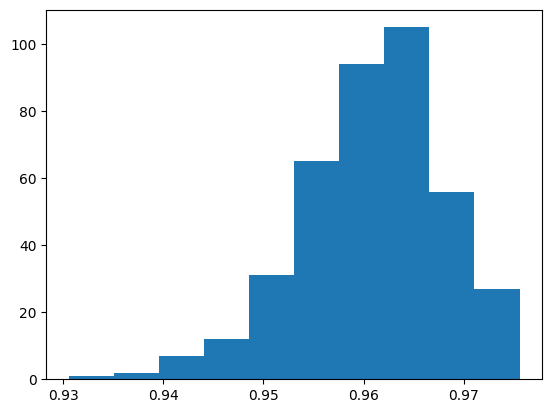

In [1038]:
auc_latest(0.024, 0.776, 10, 90, 100, 400)

In [660]:
def convex_hull_(fprs, tprs):
    hull = ConvexHull(np.vstack([np.hstack([fprs, [1.0]]), np.hstack([tprs, 0.0])]).T)
    vertices = hull.vertices[hull.vertices < len(fprs)]
    sorting = np.argsort(vertices)
    fprs_ch = fprs[vertices[sorting]]
    tprs_ch = tprs[vertices[sorting]]
    return fprs_ch, tprs_ch

[84 88 93 89 89 89 92 92 86 90] [116 106 112 106 114 108 113 108 112 115] [84 88 93 89 89 89 92 92 86 90] [116 106 112 106 114 108 113 108 112 115]


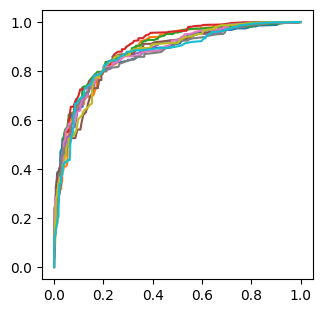

In [1066]:
fprs, tprs = sample_latest(0.2, 0.8, 1000, 1000, n_nodes=1000, n_samples=10)

plt.figure(figsize=(3.5, 3.5))
for fprs1, tprs1 in zip(fprs, tprs):
    plt.plot(fprs1, tprs1)

np.float64(0.6547222222222222)

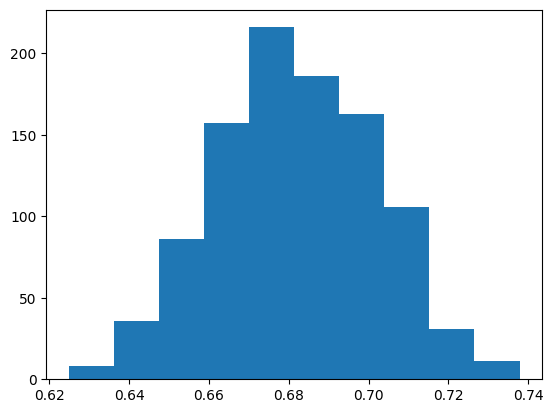

In [1040]:
auc_latest(0.7, 0.92, 900, 100, 200, 1000)

In [556]:
fprs.shape, fpr_samp.shape

((10, 102), (10, 20))

In [558]:
fpr_samp[0]

array([0, 0, 1, 1, 1, 1, 2, 3, 3, 4, 4, 5, 5, 6, 7, 7, 8, 9, 9, 9])

In [559]:
fprs[0]

array([0.00000000e+00, 2.74873232e-04, 5.93048625e-04, 1.57165266e-03,
       3.56340299e-03, 6.03342035e-03, 8.76610688e-03, 1.18704501e-02,
       1.49937458e-02, 1.81687624e-02, 2.13968177e-02, 2.48774386e-02,
       2.84604552e-02, 3.23549138e-02, 3.63155055e-02, 4.07239163e-02,
       4.51379310e-02, 5.00503211e-02, 5.50108485e-02, 6.00038033e-02,
       6.52891194e-02, 7.07703192e-02, 7.62766266e-02, 8.19980575e-02,
       8.77756346e-02, 9.35545138e-02, 9.93521963e-02, 1.05292199e-01,
       1.11280650e-01, 1.17414641e-01, 1.23774541e-01, 1.30160506e-01,
       1.36602680e-01, 1.43071887e-01, 1.49644220e-01, 1.56294736e-01,
       1.63250772e-01, 1.70370928e-01, 1.77525954e-01, 1.84724617e-01,
       1.91994270e-01, 1.99282578e-01, 2.06584273e-01, 2.14045043e-01,
       2.22151140e-01, 2.30816694e-01, 2.39736499e-01, 2.48724594e-01,
       2.57954092e-01, 2.67211616e-01, 2.76486401e-01, 2.86015406e-01,
       2.95632066e-01, 3.05498943e-01, 3.15400110e-01, 3.25620184e-01,
      

In [557]:
fprs[np.arange(10)[:, None], fpr_samp]

array([[0.00000000e+00, 0.00000000e+00, 2.74873232e-04, 2.74873232e-04,
        2.74873232e-04, 2.74873232e-04, 5.93048625e-04, 1.57165266e-03,
        1.57165266e-03, 3.56340299e-03, 3.56340299e-03, 6.03342035e-03,
        6.03342035e-03, 8.76610688e-03, 1.18704501e-02, 1.18704501e-02,
        1.49937458e-02, 1.81687624e-02, 1.81687624e-02, 1.81687624e-02],
       [0.00000000e+00, 9.02888875e-04, 1.40126178e-03, 1.40126178e-03,
        2.04853637e-03, 2.73328257e-03, 3.52349190e-03, 3.52349190e-03,
        5.30542771e-03, 8.25584975e-03, 9.98840268e-03, 9.98840268e-03,
        1.17438664e-02, 1.17438664e-02, 1.60151808e-02, 1.86088852e-02,
        1.86088852e-02, 1.86088852e-02, 2.12197137e-02, 2.12197137e-02],
       [0.00000000e+00, 6.82866667e-04, 6.82866667e-04, 1.15253058e-03,
        1.64235567e-03, 2.77438189e-03, 2.77438189e-03, 2.77438189e-03,
        3.41213807e-03, 4.46111624e-03, 7.24213686e-03, 9.08593164e-03,
        1.09587821e-02, 1.48289521e-02, 1.68894353e-02, 1.9148

In [535]:
def sample(fpr0, tpr0, n_nodes=100):
    fprs = np.sort(np.random.random_sample(n_nodes))
    tprs = np.sort(np.random.random_sample(n_nodes))[::-1]

    fprs = np.cumsum(fprs/np.sum(fprs))
    tprs = np.cumsum(tprs/np.sum(tprs))

    fpr_idx = np.argmin(np.abs(fpr0 - fprs))
    tpr_idx = np.argmin(np.abs(tpr0 - tprs))

    #print(fpr_idx, tpr_idx)

    if fpr_idx > tpr_idx:
        print('yes')
        fprs2 = np.sort(np.random.choice(fprs[:fpr_idx], tpr_idx, replace=True))
        tprs2 = np.sort(np.random.choice(tprs[-tpr_idx:], fpr_idx, replace=True))
        fprs_new = np.hstack([fprs2, tprs[-tpr_idx:]])
        tprs_new = np.hstack([fprs[:fpr_idx], tprs2])
    elif tpr_idx > fpr_idx:
        fprs2 = np.sort(np.random.choice(fprs[fpr_idx:], n_nodes - tpr_idx, replace=True))
        tprs2 = np.sort(np.random.choice(tprs[:tpr_idx], fpr_idx, replace=True))
        fprs_new = np.hstack([fprs[:fpr_idx], fprs2])
        tprs_new = np.hstack([tprs2, tprs[tpr_idx:]])

    fprs_new = np.hstack([[0], fprs_new, [1]])
    tprs_new = np.hstack([[0], tprs_new, [1]])
    return fprs_new, tprs_new

In [536]:
aucs = [integrate_roc_curve(*sample(0.024, 0.776)) for _ in range(100)]

In [541]:
np.percentile(aucs, 88)

np.float64(0.9526885256765021)

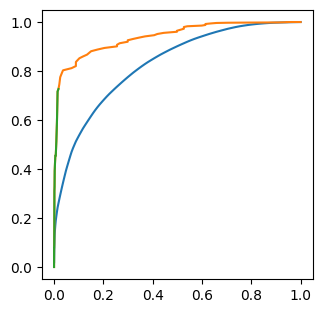

In [533]:
plt.figure(figsize=(3.5, 3.5))
plt.plot(fprs, tprs)
plt.plot(fprs_new, tprs_new)
plt.plot(fprs_new[:fpr_idx], tprs_new[:fpr_idx])

In [471]:
len(fprs), len(tprs)

(100, 100)

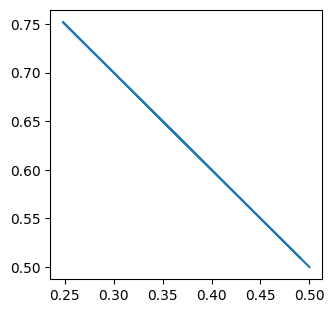

In [472]:
plt.figure(figsize=(3.5, 3.5))
plt.plot(fprs, tprs)

In [412]:
fprs, tprs

(array([3.99081737e-06, 1.71392923e-05, 4.14966374e-05, 7.95956774e-05,
        1.31451002e-04, 2.03126647e-04, 2.95809452e-04, 4.28460031e-04,
        6.02427542e-04, 8.27133500e-04, 1.10286820e-03, 1.43154352e-03,
        1.81357459e-03, 2.26006758e-03, 2.77629437e-03, 3.36608374e-03,
        4.04470728e-03, 4.81472579e-03, 5.67796889e-03, 6.67132452e-03,
        7.80044965e-03, 9.06775783e-03, 1.04735601e-02, 1.20254937e-02,
        1.37236591e-02, 1.55760861e-02, 1.75828597e-02, 1.97475178e-02,
        2.20806148e-02, 2.45990286e-02, 2.73239066e-02, 3.02660828e-02,
        3.34282048e-02, 3.68283745e-02, 4.04707344e-02, 4.43566016e-02,
        4.84859978e-02, 5.28603089e-02, 5.74866590e-02, 6.23667842e-02,
        6.75008412e-02, 7.28950313e-02, 7.85545247e-02, 8.44831506e-02,
        9.06832952e-02, 9.71576462e-02, 1.03911273e-01, 1.10946420e-01,
        1.18273660e-01, 1.25894414e-01, 1.33818676e-01, 1.42050349e-01,
        1.50591695e-01, 1.59447899e-01, 1.68630532e-01, 1.781449

In [405]:
fprs_left = np.cumsum(fprs/np.sum(fprs)*fpr0)
tprs_left = np.cumsum(tprs/np.sum(tprs)*tpr0)

fprs_right = np.cumsum(fprs/np.sum(fprs)*(1 - fpr0)) + fpr0
tprs_right = np.cumsum(tprs/np.sum(tprs)*(1 - tpr0)) + tpr0

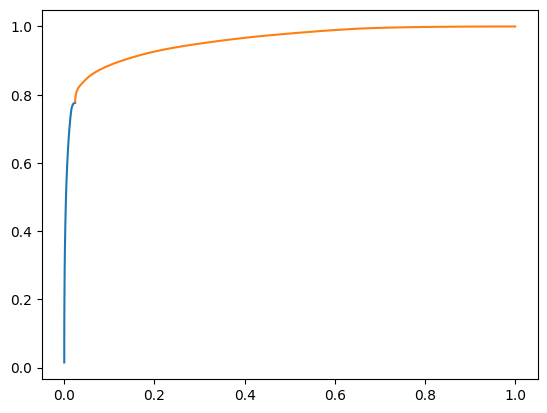

In [406]:
plt.plot((fprs_left), (tprs_left))
plt.plot((fprs_right), (tprs_right))

In [214]:
#@nb.jit(nopython=True)
def generate_roc_curve_(fpr0, tpr0, p, n, max_nodes, n_samples=100, symmetric=False):
    fpr0 = np.round(fpr0 * n)/n
    tpr0 = np.round(tpr0 * p)/p

    fprs = np.zeros((n_samples, max_nodes))
    tprs = np.zeros((n_samples, max_nodes))

    fprs[:, 2] = fpr0
    fprs[:, 1] = 1.0
    tprs[:, 2] = tpr0
    tprs[:, 1] = 1.0

    pool = [(0, 2, np.repeat(True, n_samples), n_samples), (2, 1, np.repeat(True, n_samples), n_samples)]

    idx = 3

    if symmetric:
        fill_to = int((max_nodes) / 2) + 1
    else:
        fill_to = max_nodes

    while idx < fill_to and len(pool) > 0:
        item = pool[0]
        pool = pool[1:]

        left, right, mask, n_mask = item

        if n_mask == 0:
            continue

        fpr1 = np.random.random_sample(n_mask) * (fprs[:, right][mask] - fprs[:, left][mask]) + fprs[:, left][mask]
        tpr1 = np.random.random_sample(n_mask) * (tprs[:, right][mask] - tprs[:, left][mask]) + tprs[:, left][mask]

        fpr1 = np.round(fpr1 * n) / n
        tpr1 = np.round(tpr1 * p) / p

        fpr1a = fprs[:, left].copy()
        fpr1a[mask] = fpr1

        tpr1a = tprs[:, left].copy()
        tpr1a[mask] = tpr1

        fprs[:, idx] = fpr1a
        tprs[:, idx] = tpr1a

        mask_left = mask & (fprs[:, left] != fprs[:, idx]) & (tprs[:, left] != tprs[:, idx])
        mask_right = mask & (fprs[:, right] != fprs[:, idx]) & (tprs[:, right] != tprs[:, idx])

        pool.append((left, idx, mask_left, np.sum(mask_left)))
        pool.append((idx, right, mask_right, np.sum(mask_right)))

        pool = sorted(pool, key=lambda item: -item[3])

        idx += 1

    filled_to = idx

    #print(fprs[0], tprs[0])

    if symmetric:
        fprs[:, (filled_to):(2*filled_to - 2)] = 1.0 - tprs[:, 2:(filled_to)]
        tprs[:, (filled_to):(2*filled_to - 2)] = 1.0 - fprs[:, 2:(filled_to)]
        filled_to = 2*filled_to - 2
    
    #print(fprs[0], tprs[0])
    
    return fprs[:, :filled_to], tprs[:, :filled_to]


In [218]:
def generate_roc_curve(fpr0, tpr0, p, n, max_nodes, n_samples=1000, symmetric=False):
    fprs, tprs = generate_roc_curve_(fpr0, tpr0, p, n, max_nodes, n_samples=n_samples, symmetric=symmetric)
    sorting = np.argsort(fprs * (n + p) + tprs, axis=1)
    fprs, tprs = fprs[np.arange(n_samples)[:, None], sorting], tprs[np.arange(n_samples)[:, None], sorting]
    fprs = np.round(fprs * n) / n
    tprs = np.round(tprs * n) / n
    return fprs, tprs

In [373]:
fpr0 = 0.024
tpr0 = 0.776

def convexify(fpr0, tpr0, fprs, tprs):
    points = np.unique(np.vstack([fprs, tprs]).T, axis=0)
    fprs_u, tprs_u = points.T

    fprs_left = fprs_u[fprs_u < fpr0][1:]
    tprs_left = tprs_u[fprs_u < fpr0][1:]

    fprs_right = fprs_u[fprs_u > fpr0][:-1]
    tprs_right = tprs_u[fprs_u > fpr0][:-1]

    if len(fprs_left) == 0 or len(fprs_right) == 0:
        return fprs_u, tprs_u

    #print(len(fprs_left), len(fprs_right), fprs_u, tprs_u)

    slopes_fpr = fprs_right - fprs_left[:, None]
    slopes_tpr = tprs_right - tprs_left[:, None]

    slopes = slopes_tpr / slopes_fpr

    values = tprs_left[:, None] + slopes * (fpr0 - fprs_left[:, None])

    mask = values > tpr0
    row_mask = np.sum(mask, axis=1)
    col_mask = np.sum(mask, axis=0)

    throw_row = np.repeat(False, row_mask.shape)
    throw_col = np.repeat(False, col_mask.shape)

    while True:
        row_max_idx = np.argmax(row_mask)
        col_max_idx = np.argmax(col_mask)

        row_max = row_mask[row_max_idx]
        col_max = col_mask[col_max_idx]

        if row_max == 0 and col_max == 0:
            break

        if row_max >= col_max:
            throw_row[row_max_idx] = True
            col_mask = col_mask - mask[row_max_idx]
            row_mask[row_max_idx] = 0
        if col_max > row_max:
            throw_col[col_max_idx] = True
            row_mask = row_mask - mask[:, col_max_idx]
            col_mask[col_max_idx] = 0
        
    
    fprs_left = fprs_left[~throw_row]
    tprs_left = tprs_left[~throw_row]

    fprs_right = fprs_right[~throw_col]
    tprs_right = tprs_right[~throw_col]

    return np.hstack([[0], fprs_left, [fpr0], fprs_right, [1]]), np.hstack([[0], tprs_left, [tpr0], tprs_right, [1]])

In [299]:
def convex_hull_area(fpr0, tpr0, p, n, max_nodes=50, n_samples=1000, symmetric=False):
    fprs, tprs = generate_roc_curve(fpr0, tpr0, p, n, max_nodes, n_samples=n_samples, symmetric=symmetric)
    aucs = []
    for fprs1, tprs1 in zip(fprs, tprs):
        fprs1, tprs1 = convexify(fpr0, tpr0, fprs1, tprs1)
        fprs1, tprs1 = convexify(1.0 - tpr0, 1.0 - fpr0, fprs1, tprs1)
        fprs1, tprs1 = convex_hull_(fprs1, tprs1)
        auc = integrate_roc_curve(fprs1, tprs1)
        aucs.append(auc)
    
    return aucs

In [376]:
%%timeit
aucs = convex_hull_area(fpr0, tpr0, p, n, max_nodes=50, n_samples=1000, symmetric=False)

390 ms ± 8.68 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [375]:
np.percentile(aucs, 90)

np.float64(0.964262)

In [282]:
from scipy.spatial import ConvexHull

In [283]:
%%timeit
fprs1, tprs1 = convexify2(fprs[0], tprs[0])

142 μs ± 893 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [297]:
%%timeit
fprs1, tprs1 = convexify(fpr0, tpr0, fprs[0], tprs[0])

86.3 μs ± 166 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [294]:
fprs1, tprs1 = convexify(fpr0, tpr0, fprs[0], tprs[0])

[ 0  0  0 21] [0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


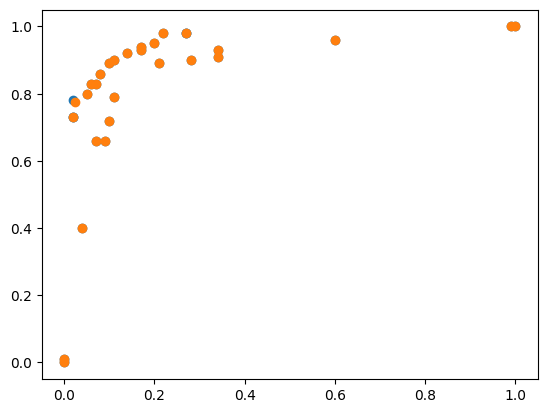

In [295]:
plt.scatter(fprs[0], tprs[0])
plt.scatter(fprs1, tprs1)

In [256]:
fprs_left.shape, fprs_right.shape, slopes.shape, values.shape

((4,), (24,), (4, 24), (4, 24))

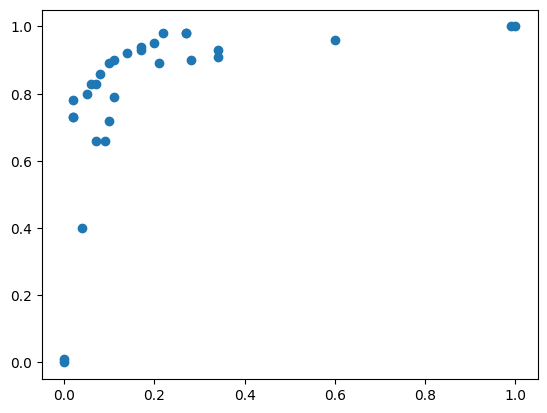

In [257]:
plt.scatter(fprs[0], tprs[0])

In [258]:
values > tpr0

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False],
       [False,  True,  True, False,  True,  True, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True]])

In [211]:
fpr0 = 0.024
tpr0 = 0.776
p = 100
n = 100
max_nodes = 50

In [219]:
%%timeit
fprs, tprs = generate_roc_curve(fpr0, tpr0, p, n, max_nodes=50, n_samples=1000, symmetric=False)

4.25 ms ± 17 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [254]:
fprs, tprs = generate_roc_curve(fpr0, tpr0, p, n, max_nodes=30, n_samples=1000, symmetric=True)

In [227]:
convex_hull(fprs[0], tprs[0])

[0.   0.   0.01 0.01 0.01 0.02 0.02 0.02 0.03 0.04 0.04 0.05 0.06 0.06
 0.07 0.11 0.12 0.13 0.13 0.14 0.15 0.15 0.16 0.17 0.17 0.18 0.18 0.18
 0.18 0.22 0.25 0.29 0.29 0.4  0.4  0.68 0.72 1.  ] [0.   0.28 0.32 0.6  0.71 0.6  0.78 0.82 0.82 0.82 0.83 0.83 0.71 0.85
 0.85 0.75 0.86 0.82 0.84 0.88 0.93 0.94 0.87 0.95 0.96 0.87 0.96 0.97
 0.98 0.98 0.89 0.94 0.99 0.98 0.99 0.99 1.   1.  ]


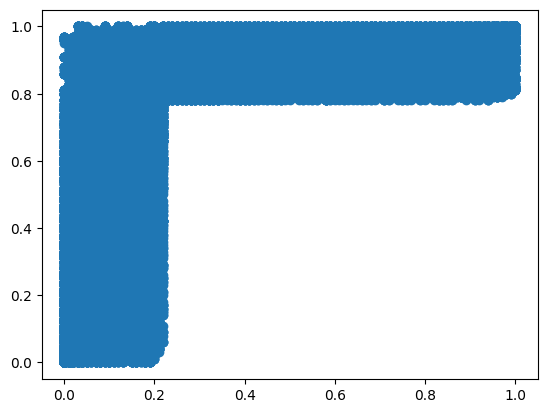

In [228]:
plt.scatter(fprs, tprs)

In [222]:
fprs[0], tprs[0]

(array([0.  , 0.  , 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
        0.02, 0.03, 0.04, 0.04, 0.05, 0.06, 0.06, 0.06, 0.06, 0.07, 0.11,
        0.12, 0.13, 0.13, 0.14, 0.15, 0.15, 0.15, 0.15, 0.16, 0.17, 0.17,
        0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.22, 0.22, 0.22, 0.25, 0.29,
        0.29, 0.4 , 0.4 , 0.68, 0.72, 1.  ]),
 array([0.  , 0.28, 0.32, 0.6 , 0.71, 0.6 , 0.78, 0.78, 0.78, 0.82, 0.82,
        0.82, 0.82, 0.82, 0.83, 0.83, 0.71, 0.85, 0.85, 0.85, 0.85, 0.75,
        0.86, 0.82, 0.84, 0.88, 0.93, 0.94, 0.94, 0.94, 0.87, 0.95, 0.96,
        0.87, 0.96, 0.97, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.89, 0.94,
        0.99, 0.98, 0.99, 0.99, 1.  , 1.  ]))

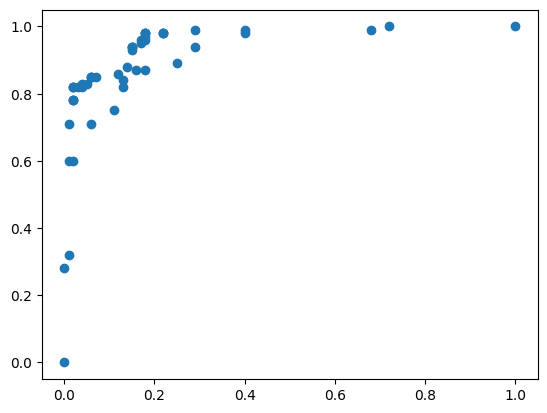

In [223]:
plt.scatter(fprs[0], tprs[0])

In [9]:
fpr = sp.Symbol('fpr')
tpr = sp.Symbol('tpr')
p = sp.Symbol('p')

In [14]:
def tpr(fpr, p):
    return (1 - (1 - fpr)**p)**(1/p)

In [15]:
def dtpr(fpr, p):
    return (1 - fpr)**(p - 1)*(1 - (1 - fpr)**p)**((1-p)/p)

In [18]:
tpr0 = tpr(0.024, 7)
tpr0

0.767152313464003

In [42]:
# f(1 - f(x)) = 1 - x
1.0 - tpr(1 - tpr0, 7)

0.02400000000000002

In [40]:
dtpr(0.024, 7)

4.240424271179171

In [41]:
1.0 / dtpr(1 - tpr(0.024, 7), 7)

4.2404242711791715

In [13]:
sp.simplify(sp.diff((1.0 - (1 - fpr)**p)**(1/p), fpr))

(1 - fpr)**(p - 1)*(1.0 - (1 - fpr)**p)**((1 - p)/p)

In [4]:
fprs = np.array([0.0, 0.024, 1.0])
tprs = np.array([0.0, 0.776, 1.0])

fnrs = 1.0 - tprs
tnrs = 1.0 - fprs

In [ ]:
p_both = p_norm_fit(1 - fprs, tprs, bracket=(0, 2))

x = np.linspace(0, 1, 1000)
y = (1.0 - (1 - x)**p_both)**(1/p_both)

In [6]:
p_both2 = p_norm_fit(1 - fnrs, tnrs, bracket=(0, 2))

x = np.linspace(0, 1, 1000)
y = (1.0 - (1 - x)**p_both2)**(1/p_both2)

In [7]:
p_both, p_both2

(np.float64(7.201595336442369), np.float64(7.201595336442369))

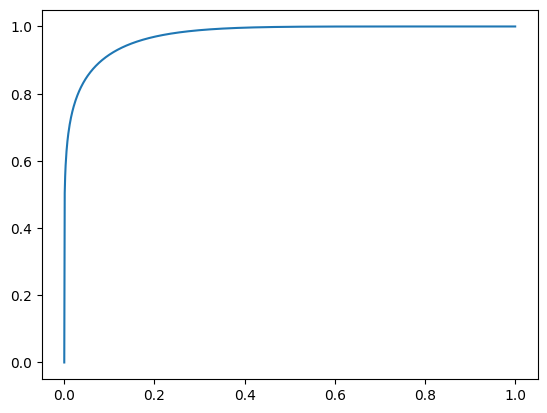

In [5]:
plt.plot(x, y)

In [385]:
N_SAMPLES = 100000

In [386]:
fprs, tprs = sample1(0.0, 0.0, N_SAMPLES, 50, mode='min-max')

In [387]:
fprs[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03289333, 0.06895542,
       0.35845198, 0.38191443, 0.45898064, 0.51048639, 0.54581436,
       0.54740063, 0.54816909, 0.69341813, 0.79423582, 0.89877849,
       0.93318103, 0.95373505, 0.99211622, 0.99572221, 1.        ])

In [388]:
fprs = fprs[:, 32:]
tprs = tprs[:, 32:]

In [389]:
fprs[0]

array([0.        , 0.03289333, 0.06895542, 0.35845198, 0.38191443,
       0.45898064, 0.51048639, 0.54581436, 0.54740063, 0.54816909,
       0.69341813, 0.79423582, 0.89877849, 0.93318103, 0.95373505,
       0.99211622, 0.99572221, 1.        ])

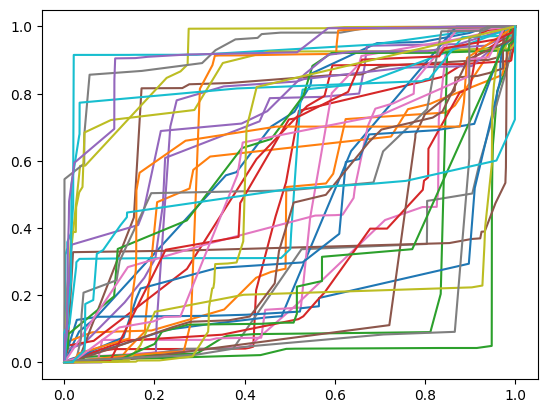

In [390]:
for idx in range(40):
    plt.plot(fprs[idx], tprs[idx])

In [391]:
fprs.shape

(100000, 18)

In [392]:
fprs0 = np.linspace(0, 1, 20)

In [393]:
diffs = np.abs(fprs[:, :, None] - fprs0)

In [394]:
diffs[0]

array([[0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
        0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ],
       [0.03289333, 0.01973825, 0.07236983, 0.12500141, 0.17763299,
        0.23026457, 0.28289614, 0.33552772, 0.3881593 , 0.44079088,
        0.49342246, 0.54605404, 0.59868562, 0.6513172 , 0.70394878,
        0.75658035, 0.80921193, 0.86184351, 0.91447509, 0.96710667],
       [0.06895542, 0.01632384, 0.03630773, 0.08893931, 0.14157089,
        0.19420247, 0.24683405, 0.29946563, 0.35209721, 0.40472879,
        0.45736037, 0.50999195, 0.56262352, 0.6152551 , 0.66788668,
        0.72051826, 0.77314984, 0.82578142, 0.878413  , 0.93104458],
       [0.35845198, 0.3058204 , 0.25318882, 0.20055724, 0.14792566,
        0.09529408, 0.0426625 , 0.00996908, 0.06260065, 0.11523223,
        0.16786381, 0.22049539, 0.27312697, 0

In [395]:
fprs0_idx = np.argmin(diffs, axis=1)

In [396]:
fprs0_idx.shape

(100000, 20)

In [397]:
np.repeat(np.arange(N_SAMPLES), 20).reshape(N_SAMPLES, 20)

array([[    0,     0,     0, ...,     0,     0,     0],
       [    1,     1,     1, ...,     1,     1,     1],
       [    2,     2,     2, ...,     2,     2,     2],
       ...,
       [99997, 99997, 99997, ..., 99997, 99997, 99997],
       [99998, 99998, 99998, ..., 99998, 99998, 99998],
       [99999, 99999, 99999, ..., 99999, 99999, 99999]])

In [398]:
tprs0 = tprs[np.repeat(np.arange(N_SAMPLES), 20).reshape(N_SAMPLES, 20), fprs0_idx]
fprs0b = fprs[np.repeat(np.arange(N_SAMPLES), 20).reshape(N_SAMPLES, 20), fprs0_idx]

In [399]:
fprs0b[91], tprs0[91]

(array([0.        , 0.06194127, 0.06194127, 0.17072579, 0.17072579,
        0.26182704, 0.30436752, 0.30436752, 0.30436752, 0.30436752,
        0.30436752, 0.75514167, 0.75514167, 0.75514167, 0.75514167,
        0.75514167, 0.75514167, 0.95915634, 0.95915634, 1.        ]),
 array([0.        , 0.54057671, 0.54057671, 0.6341045 , 0.6341045 ,
        0.65015174, 0.85493939, 0.85493939, 0.85493939, 0.85493939,
        0.85493939, 0.89007475, 0.89007475, 0.89007475, 0.89007475,
        0.89007475, 0.89007475, 0.97337012, 0.97337012, 1.        ]))

In [400]:
fprs[91], tprs[91]

(array([0.        , 0.01343037, 0.01676122, 0.025319  , 0.03230558,
        0.06194127, 0.17072579, 0.26182704, 0.27108453, 0.27332193,
        0.29886679, 0.30436752, 0.75514167, 0.95915634, 0.96083732,
        0.97324097, 0.991961  , 1.        ]),
 array([0.00000000e+00, 7.69639127e-04, 5.40833544e-03, 4.35935036e-02,
        1.80994647e-01, 5.40576712e-01, 6.34104504e-01, 6.50151737e-01,
        6.87538933e-01, 6.97224707e-01, 7.10701901e-01, 8.54939390e-01,
        8.90074749e-01, 9.73370123e-01, 9.93289050e-01, 9.97039077e-01,
        9.99080679e-01, 1.00000000e+00]))

In [401]:
aucs[91]

np.float64(0.4457878005537401)

In [402]:
tprs0.shape

(100000, 20)

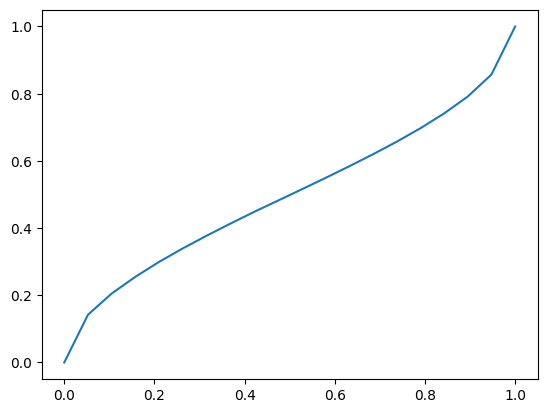

In [403]:
plt.plot(fprs0, np.mean(tprs0, axis=0))

In [404]:
aucs = integrate_roc_curves(fprs, tprs)

In [405]:
diffs = []
records = []
for idx in range(20):
    diffs.append(np.mean(((1 - fprs0b[:, idx]) + tprs0[:, idx])/2.0 - aucs))
    for jdx in range(N_SAMPLES):
        records.append((fprs0b[jdx, idx], tprs0[jdx, idx], (1.0 - fprs0b[jdx, idx] + tprs0[jdx, idx])/2.0, aucs[jdx], jdx))

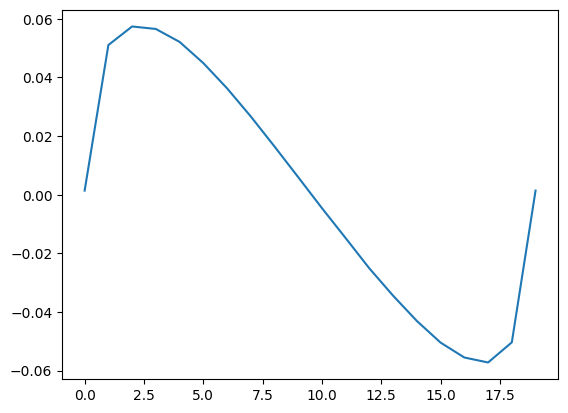

In [406]:
plt.plot(diffs)

In [407]:
data = pd.DataFrame(records, columns=['fpr', 'tpr', 'auc_min_max', 'auc', 'jdx'])

In [408]:
data['diff'] = data['auc_min_max'] - data['auc']

In [409]:
data['tpr'] = np.round(data['tpr'] * 20) / 20
data['fpr'] = np.round(data['fpr'] * 20) / 20

In [410]:
data[(data['fpr'] < 0.05) & (data['tpr'] > 0.95)]

,fpr,tpr,auc_min_max,auc,jdx,diff
100590,0.0,1.0,0.988224,0.996012,590,-0.007788
101400,0.0,1.0,0.986870,0.983251,1400,0.003619
101643,0.0,1.0,0.988887,0.989282,1643,-0.000394
103021,0.0,1.0,0.990718,0.990684,3021,0.000034
103775,0.0,1.0,0.980762,0.971152,3775,0.009611
...,...,...,...,...,...,...
501400,0.0,1.0,0.986870,0.983251,1400,0.003619
517733,0.0,1.0,0.986907,0.994708,17733,-0.007800
537786,0.0,1.0,0.982434,0.985188,37786,-0.002754
637786,0.0,1.0,0.982434,0.985188,37786,-0.002754


In [411]:
res = data.groupby(['fpr', 'tpr']).agg({'diff': 'mean', 'auc_min_max': 'mean', 'auc': 'mean'})

In [412]:
res

diff  auc_min_max       auc
fpr tpr                                  
0.0 0.00  0.033691     0.499789  0.466098
    0.05  0.116312     0.516642  0.400331
    0.10  0.085225     0.542422  0.457198
    0.15  0.091652     0.567467  0.475815
    0.20  0.083833     0.592177  0.508344
...            ...          ...       ...
1.0 0.80 -0.080525     0.406942  0.487467
    0.85 -0.081936     0.432173  0.514109
    0.90 -0.095213     0.457247  0.552459
    0.95 -0.124691     0.483306  0.607997
    1.00 -0.047268     0.500104  0.547372

[441 rows x 3 columns]

In [413]:
final = res.reset_index(drop=False)

In [414]:
final.to_csv('mapping.csv', index=False)

In [255]:
values = res.reset_index(drop=False).pivot(index='tpr', columns='fpr', values='diff')

In [256]:
values

fpr,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,...,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1.00
tpr,,,,,,,,,,,,,,,,,,,,,
0.00,-0.217504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.05,-0.134464,-0.160851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.10,-0.125137,-0.151839,-0.154926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.15,-0.114347,-0.137173,-0.133838,-0.126512,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.20,-0.077373,-0.102463,-0.105434,-0.114891,-0.126257,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.25,-0.068749,-0.097436,-0.097887,-0.088954,-0.100218,-0.103476,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.30,-0.065992,-0.075534,-0.084476,-0.083753,-0.087739,-0.083906,-0.082919,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.35,-0.053883,-0.063103,-0.058402,-0.065729,-0.075505,-0.077070,-0.073670,-0.079612,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.40,-0.051574,-0.049344,-0.057503,-0.050031,-0.057608,-0.063780,-0.067518,-0.084174,-0.074076,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


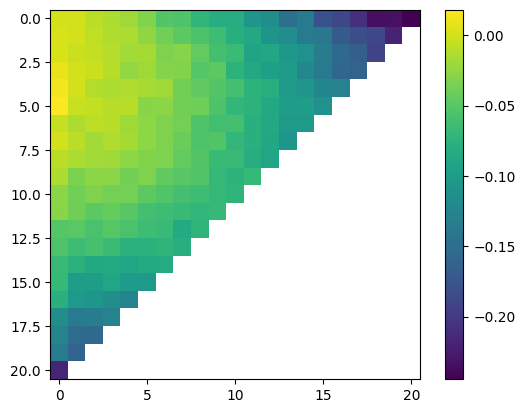

In [258]:
plt.imshow(values[::-1])
plt.colorbar()

In [264]:
tmp = res.reset_index(drop=False)[['fpr', 'tpr', 'diff']].values

In [289]:
x = tmp[:, [0, 1]]
y = -tmp[:, 2]

In [290]:
from scipy.optimize import curve_fit

In [311]:
def model(xy, x0, y0, deg0, deg1):
    return np.abs(xy[:, 0] - x0)**deg0 + np.abs(xy[:, 1] - y0)**deg1 - np.abs(xy[:, 0] - x0)*np.abs(xy[:, 1] - y0)

In [312]:
curve_fit(model, x, y, p0=(0.5, 0.5, 2, 2))

(array([0.27160865, 0.64484641, 2.14944726, 2.25941687]),
 array([[ 8.37398682e-05,  1.08526543e-05, -3.17313484e-04,
          6.92666074e-05],
        [ 1.08526543e-05,  5.78959030e-05, -3.79759005e-05,
          9.79205405e-05],
        [-3.17313484e-04, -3.79759005e-05,  2.71248932e-03,
         -1.32014121e-03],
        [ 6.92666074e-05,  9.79205405e-05, -1.32014121e-03,
          2.06973636e-03]]))

In [314]:
def auc_diff(fpr, tpr):
    x0, y0, deg0, deg1 = np.array([0.27160865, 0.64484641, 2.14944726, 2.25941687])
    return np.abs(fpr - x0)**deg0 + np.abs(tpr - y0)**deg1 - np.abs(fpr - x0)*np.abs(tpr - y0)

In [315]:
auc_diff(0.2, 0.8)

np.float64(0.007192990007899658)

In [316]:
tmp2 = res.reset_index(drop=False)
tmp2['diff2'] = res.reset_index(drop=False).apply(lambda row: auc_diff(row['fpr'], row['tpr']), axis=1)

In [317]:
tmp2

,fpr,tpr,diff,auc_min_max,auc,diff2
0,0.00,0.00,-0.217504,0.500026,0.717530,0.256661
1,0.00,0.05,-0.134464,0.517945,0.652409,0.208382
2,0.00,0.10,-0.125137,0.543801,0.668938,0.166320
3,0.00,0.15,-0.114347,0.568141,0.682488,0.130334
4,0.00,0.20,-0.077373,0.594038,0.671410,0.100274
...,...,...,...,...,...,...
226,0.90,0.95,-0.187314,0.525460,0.712774,0.245073
227,0.90,1.00,-0.233583,0.544101,0.777684,0.241641
228,0.95,0.95,-0.219711,0.508788,0.728499,0.295713
229,0.95,1.00,-0.233188,0.520047,0.753236,0.289781


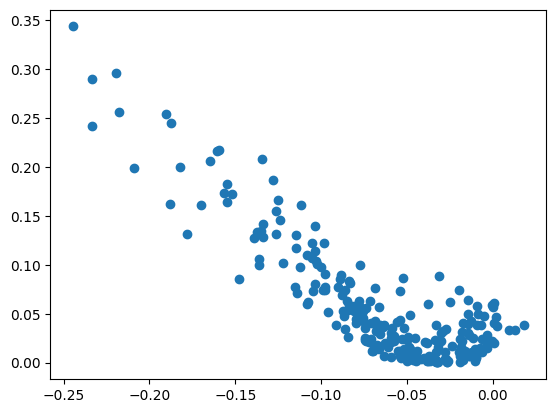

In [318]:
plt.scatter(tmp2['diff'], tmp2['diff2'])

In [261]:
from numpy.polynomial.polynomial import Polynomial

In [275]:
tmp[:, [0, 1]].T.shape

(2, 231)

In [ ]:
p = Polynomial.fit(, deg=2)

ValueError: Coefficient array is not 1-d

In [189]:
len(aucs0), len(aucs)

(19, 10000)

ValueError: x and y must be the same size

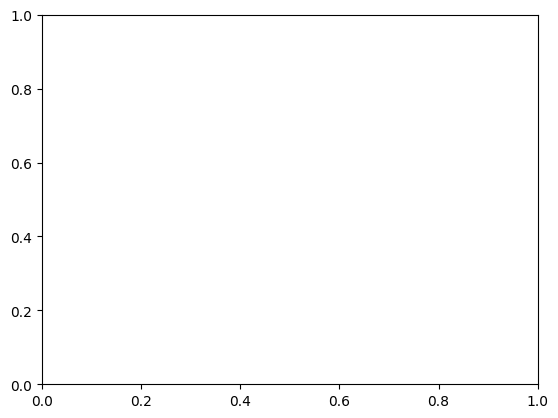

In [190]:
plt.scatter(aucs, aucs0)

In [ ]:
fprs0_idx

array([[0, 0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 5, 5, 5, 5, 6, 6, 6],
       [0, 0, 1, 1, 2, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6],
       [0, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 5, 5, 5, 6, 6, 6],
       [0, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6],
       [0, 1, 1, 2, 2, 3, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6],
       [0, 1, 2, 2, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6],
       [0, 1, 2, 2, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6],
       [0, 0, 0, 1, 1, 1, 1, 2, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6],
       [0, 1, 2, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6],
       [0, 1, 1, 2, 2, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6],
       [0, 2, 2, 2, 3, 3, 3, 3, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6],
       [0, 1, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6],
       [0, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6],
       [0, 2, 2, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6],
       [0, 4, 4, 4, 4, 4, 4, 5, 5,

In [ ]:
aucs_min_max = (fprs[np.arange(1000)[:, None], fprs0_idx] + tprs[np.arange(1000)[:, None], fprs0_idx])/2.0

In [ ]:
auc_means = np.mean(aucs_min_max, axis=0)

In [ ]:
auc_means

array([0.      , 0.09895 , 0.1539  , 0.19405 , 0.228355, 0.25818 ,
       0.286805, 0.311975, 0.335755, 0.360425, 0.382775, 0.401585,
       0.423765, 0.44935 , 0.470715, 0.49091 , 0.509865, 0.52925 ,
       0.547535, 0.56509 , 0.58058 , 0.59513 , 0.61166 , 0.62831 ,
       0.64433 , 0.662695, 0.67979 , 0.69551 , 0.71317 , 0.72593 ,
       0.742775, 0.758125, 0.77412 , 0.78784 , 0.80158 , 0.81629 ,
       0.82867 , 0.8456  , 0.859015, 0.87278 , 0.88581 , 0.89975 ,
       0.914615, 0.927995, 0.941305, 0.95553 , 0.968435, 0.980965,
       0.99245 , 1.      ])

In [ ]:
aucs_min_max.shape

(1000, 50)

In [ ]:
for idx in range(50):
    

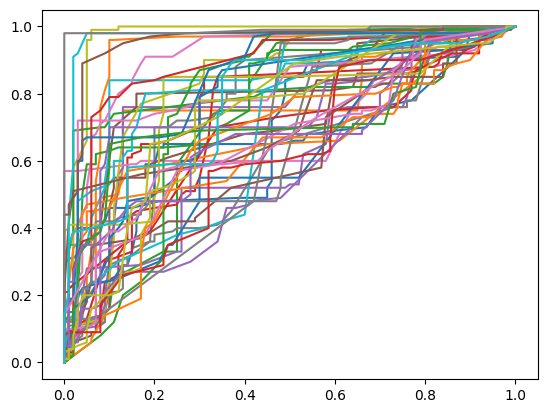

In [ ]:
for idx in range(50):
    plt.plot(fprs[idx], tprs[idx])